In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_dataset = 'data/dataset.csv'

df = pd.read_csv(url_dataset, sep=';')
df

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.000000,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,NaN,0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,1,1,1,1,0,0,0,60127,10.765556,NaN
99972,f8db22f4-9819-420c-abbc-9ddf1843176e,NaN,0,0.0,0.0,0.0,0.004044,1.0,1.0,NaN,...,1,0,1,1,0,7948,0,4740,21.708333,NaN
99973,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,NaN,45671,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,...,0,0,0,0,0,17447,19627,3100,2.185278,NaN
99974,bafcab15-9898-479c-b729-c9dda7edb78f,NaN,56102,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,...,1,1,1,1,0,18339,56180,34785,9.725278,NaN


### Preparing the dataset

In [3]:
df.default.isna().sum()

10000

In [4]:
df.default.tail(10000).isna().sum()

10000

In [5]:
df_to_predict = df.tail(10000).copy()

In [6]:
df = df.loc[:89975]

## Removing columns above 20% of NA

In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)

worst_status_active_inv                0.695074
account_worst_status_12_24m            0.667456
account_worst_status_6_12m             0.603639
account_incoming_debt_vs_paid_0_24m    0.593014
account_worst_status_3_6m              0.577243
account_status                         0.543856
account_worst_status_0_3m              0.543856
avg_payment_span_0_3m                  0.493265
avg_payment_span_0_12m                 0.238597
num_active_div_by_paid_inv_0_12m       0.229595
num_arch_written_off_0_12m             0.181215
num_arch_written_off_12_24m            0.181215
account_days_in_term_12_24m            0.118732
account_days_in_rem_12_24m             0.118732
account_days_in_dc_12_24m              0.118732
sum_paid_inv_0_12m                     0.000000
sum_capital_paid_account_12_24m        0.000000
sum_capital_paid_account_0_12m         0.000000
recovery_debt                          0.000000
status_max_archived_0_12_months        0.000000
status_max_archived_0_6_months         0

In [8]:
#df.drop(columns=['worst_status_active_inv',
#                 'account_worst_status_12_24m',
#                 'account_worst_status_6_12m',
#                 'account_incoming_debt_vs_paid_0_24m',
#                 'account_worst_status_3_6m',
#                 'account_status',
#                 'account_worst_status_0_3m',
#                 'avg_payment_span_0_3m',
#                 'avg_payment_span_0_12m',
#                 'num_active_div_by_paid_inv_0_12m',
#                 'name_in_email'], inplace=True)


In [9]:
df.has_paid = df.has_paid*1

/Users/pierre/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
#df.drop(columns=['merchant_category',
#                 'merchant_group'],inplace=True)

<AxesSubplot:>

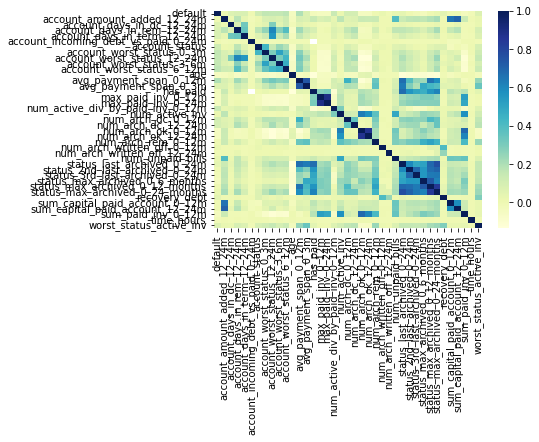

In [11]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [12]:
num_col = ['age',
           'account_amount_added_12_24m',
           'account_days_in_dc_12_24m',
           'account_days_in_rem_12_24m',
           'account_days_in_term_12_24m',
           'max_paid_inv_0_12m',
           'max_paid_inv_0_24m',
           'num_active_inv',
           'num_arch_ok_0_12m',
           'num_arch_ok_12_24m',
           'num_arch_rem_0_12m',
           'num_arch_written_off_0_12m',
           'num_arch_written_off_12_24m',
           'num_unpaid_bills',
           'recovery_debt',
           'sum_capital_paid_account_0_12m',
           'sum_paid_inv_0_12m']

cat_col = ['status_last_archived_0_24m',
           'status_max_archived_0_6_months',
           'status_max_archived_0_12_months',
           'has_paid']

In [13]:
df.status_last_archived_0_24m.value_counts()

1    64594
0    16887
2     7054
3     1439
5        2
Name: status_last_archived_0_24m, dtype: int64

In [14]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import cross_val_score, GridSearchCV

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, num_col),
    ('cat_tr', cat_transformer, cat_col)], remainder='drop')

In [15]:
pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', LogisticRegression(max_iter=3000,solver='liblinear',class_weight='balanced'))
])

In [16]:
SimpleImputer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)

In [17]:
X = df.drop(columns = ['default'])
y = df['default']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
score_baseline = cross_val_score(pipe, X, y, cv=5, scoring='recall').mean()

In [20]:
score_baseline

0.8206346333665128

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age',
                                                   'account_amount_added_12_24m',
                                                   'account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'max_paid_inv_0_12m',
                                                   'max_paid_inv_0_24m',
                                        

In [22]:
X_train_rescaled = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#getting all VIFs in a single table
vif = pd.DataFrame()

In [24]:
vif["features"] = X_train_rescaled.columns

vif["vif_index"] = [vif(X_train_rescaled.values, i) for i in range(X_train_rescaled.shape[1])]

round(X_train_rescaled.sort_values(by="vif_index", ascending = False),2)

TypeError: 'DataFrame' object is not callable

In [25]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(pipe, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
39,sum_paid_inv_0_12m,0.054746
21,num_active_inv,0.024445
11,age,0.01664
16,has_paid,0.015188
29,num_unpaid_bills,0.010297
34,status_max_archived_0_12_months,0.002588
3,account_days_in_rem_12_24m,0.001051
26,num_arch_rem_0_12m,0.001032
36,recovery_debt,0.000305
2,account_days_in_dc_12_24m,0.000263


In [26]:
from sklearn.neighbors import KNeighborsClassifier

num_col_2 = ['sum_paid_inv_0_12m',
             'num_active_inv',
             'age',
             'num_unpaid_bills',
             'num_arch_rem_0_12m',
             'account_days_in_rem_12_24m',
             'sum_capital_paid_account_0_12m',
             'account_amount_added_12_24m',
             'recovery_debt',
             'account_days_in_term_12_24m',
             'account_days_in_dc_12_24m',
             'num_arch_written_off_0_12m']

cat_col_2 = ['status_max_archived_0_12_months','has_paid']

preprocessor_2 = ColumnTransformer([
    ('num_tr', num_transformer, num_col_2),
    ('cat_tr', cat_transformer, cat_col_2)], remainder='drop')


pipe_2 = Pipeline([
    ('preproc', preprocessor_2),
    ('model', LogisticRegression(max_iter=1000,solver='liblinear',class_weight='balanced'))
])

In [27]:
score_baseline_2 = cross_val_score(pipe_2, X, y, cv=5, scoring='recall').mean()
score_baseline_2

0.7802159683889844

In [28]:
pipe_2.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['sum_paid_inv_0_12m',
                                                   'num_active_inv', 'age',
                                                   'num_unpaid_bills',
                                                   'num_arch_rem_0_12m',
                                                   'account_days_in_rem_12_24m',
                                                   'sum_capital_paid_account_0_12m',
                                                   'account_amount_added_12_24m',
                            

## Predicting

In [29]:
X_pred = df_to_predict.drop('default',axis=1)

In [30]:
y_pred = pipe_2.predict(X_test)

In [31]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [32]:
y_ = pipe_2.predict(X_pred)

In [33]:
y_

array([0., 0., 0., ..., 1., 0., 0.])